In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
class DataPreprocessing:
    """Class for data preprocessing"""

    def __init__(self, data_path):
        self.data_path = data_path
        self.scaler = StandardScaler()

    def load_and_preprocess_data(self):
        """Load and preprocess data"""
        df = pd.read_csv(self.data_path)
        df['Data'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)) # Cria uma coluna Data com as colunas Year e Month e atribui o dia 1
        df_voos = df[['Data', 'Flt']].copy()
        df_voos['Flt'] = df_voos['Flt'].str.replace(',', '') # Remove vírgulas
        df_voos['Flt'] = pd.to_numeric(df_voos['Flt'], errors='coerce')
        df_voos['Data'] = pd.to_datetime(df_voos['Data'])
        return df_voos

    def plot_time_series(self, df_voos):
        """Plot time series"""
        df_voos['Data'] = pd.PeriodIndex(df_voos['Data'], freq='M')
        df_voos.plot(figsize=(15, 6), x='Data', y='Flt', title='Série Temporal de Voos', xlabel='Data', ylabel='Voos')
        plt.ylim([min(df_voos['Flt']) - 10000, max(df_voos['Flt']) + 10000])  # Define the limits of y-axis
        plt.grid()
        plt.show()

    def normalize_data(train_data, test_data):
        train_data = scaler.fit_transform(train_data)
        test_data = scaler.transform(test_data)
        return train_data, test_data


class ErrorCalculation:
    """Class for error calculation"""
    
    def __init__(self):
        self.error = None

    def calculate_mean_squared_error(self, y_true, y_pred):
        """Calculate mean squared error"""
        return mean_squared_error(y_true, y_pred)

    def calculate_root_mean_squared_error(self, y_true, y_pred):
        """Calculate root mean squared error"""
        return mean_squared_error(y_true, y_pred, squared=False)

    def calculate_mean_absolute_percentage_error(self, y_true, y_pred):
        """Calculate mean absolute percentage error"""
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

class DataSplit:
    """Class for data split"""
    
    def __init__(self):
        self.df_train_validation = None
        self.df_test = None
    
    def split_train_validation_test(self, df_voos):
        """Split data into train, validation and test"""
        df_train_validation = df_voos[(df_voos['Data'] >= '2003-01-01') & (df_voos['Data'] <= '2019-12-01')]
        df_test = df_voos[(df_voos['Data'] >= '2020-01-01') & (df_voos['Data'] <= '2023-12-01')]
        return df_train_validation, df_test

    def split_train_validation_holdout(self, df_train_validation):
        """Split train and validation data into 70% and 30% respectively"""
        n = len(df_train_validation)
        m = int(0.70 * n)
        df_train = df_train_validation.iloc[:m]
        df_validation = df_train_validation.iloc[m:]
        return df_train, df_validation

class TimeSeriesDataPreparation:
    """Class for time series data preparation"""
    
    def __init__(self):
        self.df = None

    def create_time_window_column(self, df, column, window):
        """Create time window column"""
        for i in range(1, window + 1):
            df['Lag' + str(i)] = df[column].shift(i)
        return df

    def create_time_windows_columns(self, df, column, k_windows):
        """Create time windows columns"""
        for window in range(1, k_windows + 1):
            df = self.create_time_window_column(df, column, window)
        return df

class Plot:
    """Class for plot"""
    
    def __init__(self):
        self.plot = None

    def plot_rmse_vs_k(self, rmse_lags):
        """Plot RMSE vs K"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(rmse_lags) + 1), rmse_lags, marker='o')
        plt.xlabel('K')
        plt.ylabel('RMSE')
        plt.title('RMSE vs K')
        plt.grid()
        plt.show()

    def plot_real_vs_predicted(self, y_test, y_pred):
        plt.figure(figsize=(15, 6))
        plt.plot(y_test, marker='o', label='Real')
        plt.plot(y_test.index.to_numpy(), y_pred, marker='o', label='Predicted')
        plt.xlabel('Data')
        plt.ylabel('Voos')
        plt.title('Real vs Predicted')
        plt.legend()
        plt.show()

        
class LinearRegressionModel:
    """Class for linear regression model"""
    
    def __init__(self):
        self.model = None

    def train(self, X_train, y_train):
        """Train the model"""
        trained_model = LinearRegression().fit(X_train, y_train)
        return trained_model

    def predict(self, model, X_validation):
        """Predict the output"""
        prediction_vector = model.predict(X_validation)
        return prediction_vector
    
    

## Adotando a seguinte divisão dos dados:
    Treino e validação: 2003 - 2019
    Teste:  2020 - 2023

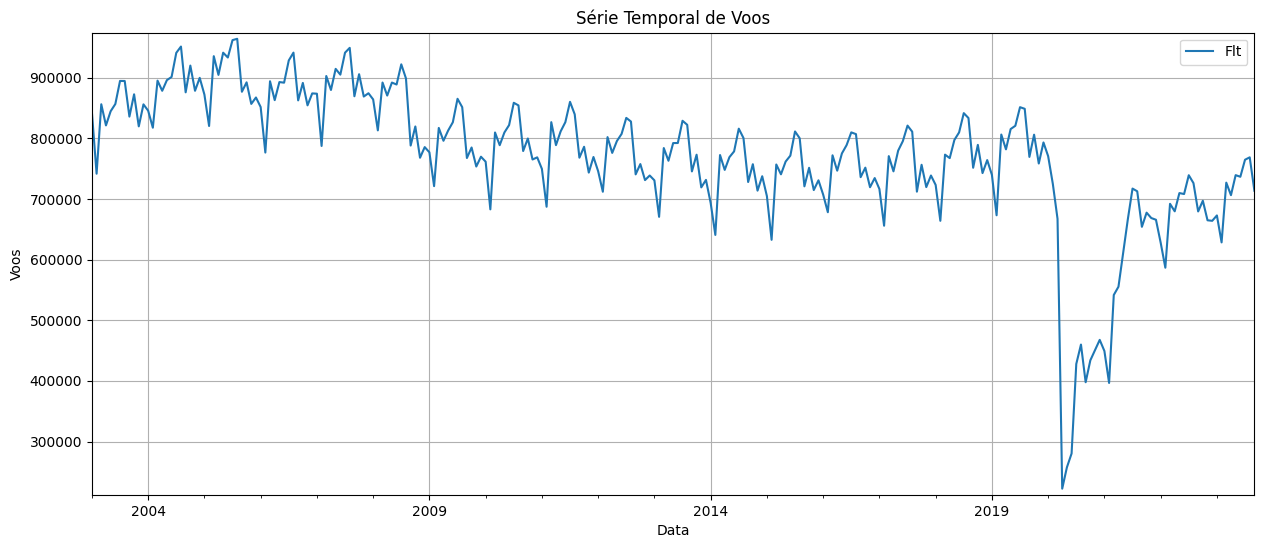

In [3]:
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data_path = 'air_traffic.csv'
data_preprocessing = DataPreprocessing(data_path)
df_voos = data_preprocessing.load_and_preprocess_data()
data_preprocessing.plot_time_series(df_voos)


As transições de comportamento na série temporal podem ser influenciadas por diversos fatores históricos e econômicos. Aqui estão algumas possíveis razões para as três faixas distintas de comportamento:

1. Jan/2003 a Ago/2008: Durante esse período, a economia global estava em um período de crescimento estável após a recessão causada pela crise financeira de 2001. Vários países estavam experimentando um crescimento econômico robusto, o que pode ter levado a um aumento na demanda por transporte aéreo. Além disso, a expansão da classe média em economias emergentes, como China e Índia, também pode ter contribuído para o aumento da demanda por viagens aéreas.

2. Set/2008 a Dez/2019: Essa faixa de tempo inclui a crise financeira global de 2008 e suas consequências. A crise financeira resultou em uma desaceleração econômica significativa em muitos países, levando a uma redução na demanda por viagens aéreas. Além disso, os altos preços do petróleo durante esse período também podem ter impactado negativamente a indústria da aviação, aumentando os custos operacionais das companhias aéreas.

3. Jan/2020 a Set/2023: Essa faixa de tempo inclui a pandemia de COVID-19, que teve um impacto sem precedentes na indústria da aviação. As restrições de viagem, o fechamento de fronteiras e as medidas de distanciamento social resultaram em uma queda drástica na demanda por viagens aéreas. As companhias aéreas enfrentaram dificuldades financeiras significativas, com muitas delas reduzindo suas operações ou até mesmo declarando falência. A recuperação da indústria da aviação após a pandemia dependerá da eficácia das medidas de controle da doença e da confiança do público em retomar as viagens.

É importante ressaltar que essas são apenas algumas possíveis razões para as transições de comportamento na série temporal. Outros fatores, como políticas governamentais, avanços tecnológicos e eventos geopolíticos, também podem ter desempenhado um papel nessas mudanças.




/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/

K = 1, RMSE = 47551.19522587639
K = 2, RMSE = 43890.16443706674
K = 3, RMSE = 43750.96176843488
K = 4, RMSE = 43260.84661067327
K = 5, RMSE = 42968.92397429032
K = 6, RMSE = 41860.65834315291
K = 7, RMSE = 30506.504135822008
K = 8, RMSE = 29939.412389660003
K = 9, RMSE = 26383.42702301162
K = 10, RMSE = 26067.039790869545
K = 11, RMSE = 26973.577758504794
K = 12, RMSE = 22620.4884074101
K = 13, RMSE = 12684.508199588025
K = 14, RMSE = 11722.431541631995
K = 15, RMSE = 12190.093905793656
K = 16, RMSE = 12114.156536736893
K = 17, RMSE = 12029.303479046683
K = 18, RMSE = 12166.707258555536
K = 19, RMSE = 12339.235531926044
K = 20, RMSE = 12212.19833167288
K = 21, RMSE = 12237.04218345833
K = 22, RMSE = 12507.555768313565
K = 23, RMSE = 12665.679851383074
K = 24, RMSE = 12651.281885430473


/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


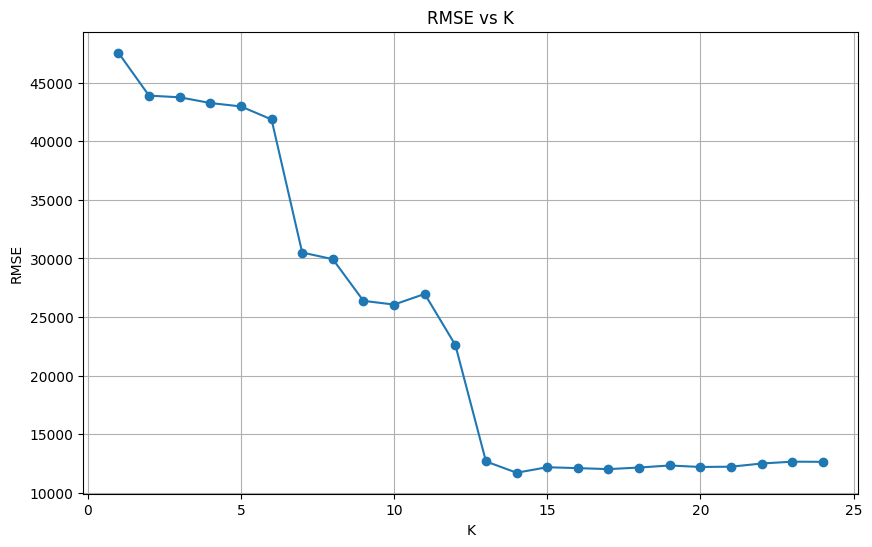

In [4]:
# Prepare data
K_WINDOWS_MAX = 24
data_preparation = TimeSeriesDataPreparation()
df_voos = data_preparation.create_time_windows_columns(df_voos, 'Flt', K_WINDOWS_MAX)

# Split data
data_split = DataSplit()
df_train_validation, df_test = data_split.split_train_validation_test(df_voos)
df_train, df_validation = data_split.split_train_validation_holdout(df_train_validation)

# Create a StandardScaler instance
scaler = StandardScaler()

# Train model and calculate errors for each k
rsmes = []
for k in range(1, K_WINDOWS_MAX + 1):
    cols = ['Lag' + str(i) for i in range(1, k + 1)]

    X_train = df_train.dropna(subset=cols)[cols]
    y_train = df_train.dropna(subset=cols)['Flt']

    X_validation = df_validation.dropna(subset=cols)[cols]
    y_validation = df_validation.dropna(subset=cols)['Flt']
    
    # Normalize data
    normalize_data = DataPreprocessing.normalize_data
    X_train, X_validation = normalize_data(X_train, X_validation)

    linear_regression_model = LinearRegressionModel()
    model = linear_regression_model.train(X_train, y_train)

    y_pred = linear_regression_model.predict(model, X_validation)

    error_calculation = ErrorCalculation()

    rmse = error_calculation.calculate_root_mean_squared_error(y_validation, y_pred)
    rsmes.append(rmse)

    print(f'K = {k}, RMSE = {rmse}')

# Plot RMSE vs K
plot = Plot()
plot.plot_rmse_vs_k(rsmes)

A partir dos resultados obtidos, podemos observar um comportamento interessante da métrica RMSE em relação ao número de entradas (K) do preditor. Vamos analisar algumas conjecturas sobre os motivos subjacentes a esse comportamento:

1. **K inicia com um valor alto e diminui gradualmente**: No início, com apenas uma entrada (K = 1), o modelo tem pouca informação para fazer previsões precisas, resultando em um alto valor de RMSE. Conforme aumentamos o número de entradas (K), o modelo tem mais informações históricas disponíveis para fazer previsões, o que geralmente leva a uma redução no RMSE.

2. **RMSE atinge um mínimo**: Podemos observar que o valor de RMSE atinge um mínimo em torno de K = 13, onde o valor é significativamente menor do que em outros pontos. Isso sugere que um modelo com 13 entradas é capaz de capturar bem os padrões e tendências nos dados de validação, resultando em previsões mais precisas.

3. **RMSE aumenta após atingir o mínimo**: Após o ponto mínimo, o valor de RMSE começa a aumentar gradualmente à medida que aumentamos o número de entradas (K). Isso pode indicar que adicionar mais entradas além de um certo ponto não melhora significativamente a capacidade do modelo de fazer previsões precisas. Pode haver um ponto de saturação onde o modelo começa a capturar mais ruído do que informações úteis dos dados.

Essas são apenas conjecturas com base nos resultados apresentados. Para uma análise mais precisa e conclusiva, seria necessário realizar uma investigação mais aprofundada, como a análise dos padrões nos dados, a aplicação de técnicas de validação cruzada e a comparação com outros modelos de previsão.

Best K = 14 with RMSE = 11722.431541631995


/tmp/ipykernel_58634/280575326.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Data'] = y_test['Data'].dt.to_timestamp()


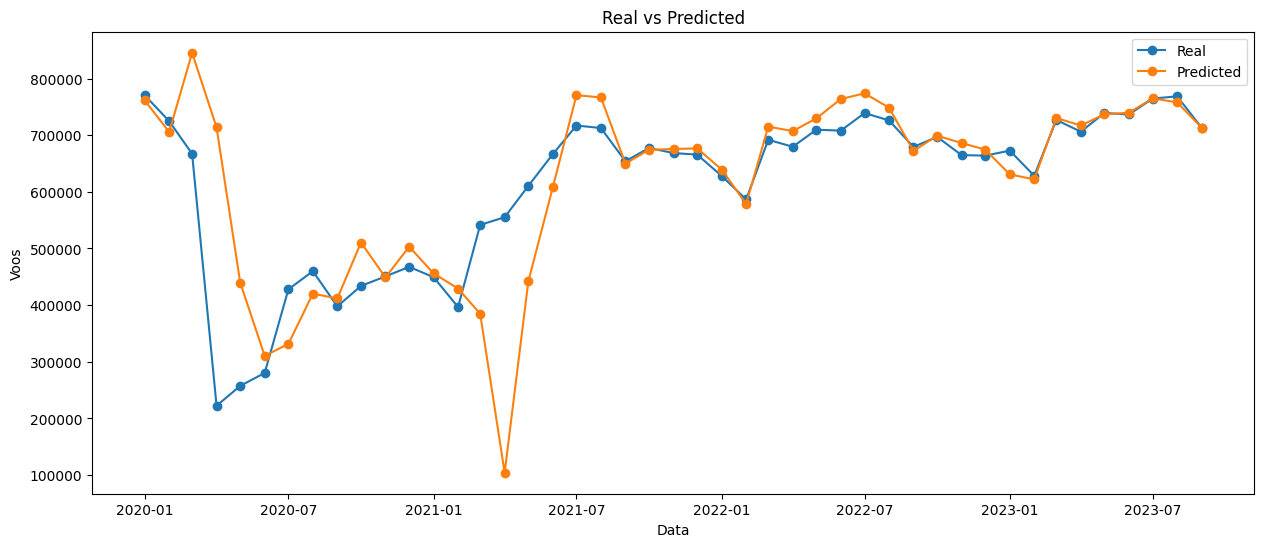

RMSE = 115719.37141006943
MAPE = 13.676157726430038


/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
# Find best K and prepare data
best_k = np.argmin(rsmes) + 1
print(f'Best K = {best_k} with RMSE = {rsmes[best_k - 1]}')
cols = ['Lag' + str(i) for i in range(1, best_k + 1)]
X_train_validation = df_train_validation.dropna(subset=cols)[cols]
y_train_validation = df_train_validation.dropna(subset=cols)['Flt']
X_test = df_test.dropna(subset=cols)[cols]
y_test = df_test[['Data', 'Flt']]

# Normalize data
normalize_data = DataPreprocessing.normalize_data
X_train, X_validation = normalize_data(X_train_validation, X_test)


# Train model with best K and predict
linear_regression_model = LinearRegressionModel()
model = linear_regression_model.train(X_train_validation, y_train_validation)

y_pred = linear_regression_model.predict(model, X_test)

# Plot real vs predicted
y_test['Data'] = y_test['Data'].dt.to_timestamp()
y_test = y_test.set_index('Data')
plot = Plot()
plot.plot_real_vs_predicted(y_test, y_pred)

# Calculate and print errors
error_calculation = ErrorCalculation()

rmse = error_calculation.calculate_root_mean_squared_error(y_test['Flt'], y_pred)
mape = error_calculation.calculate_mean_absolute_percentage_error(y_test['Flt'], y_pred)

print(f'RMSE = {rmse}')
print(f'MAPE = {mape}')

Com base nos resultados obtidos, podemos concluir que a previsão dos valores (número de voos) da série temporal em questão não foi muito precisa. Isso pode ser atribuído ao fato de que o modelo foi treinado antes da pandemia, enquanto os testes foram realizados nos dados do período da pandemia, no qual os números de voos caíram drasticamente. Essa mudança repentina e significativa no comportamento dos dados pode ter afetado a capacidade do modelo de fazer previsões precisas.

### Aplicação do modelo de regressão linear treinado com os dados de 2003 a 2019 para prever a quantidade de voos de 2022 e 2023.

/tmp/ipykernel_58634/2665665323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_2022_2023['Data'] = y_test_2022_2023['Data'].dt.to_timestamp()


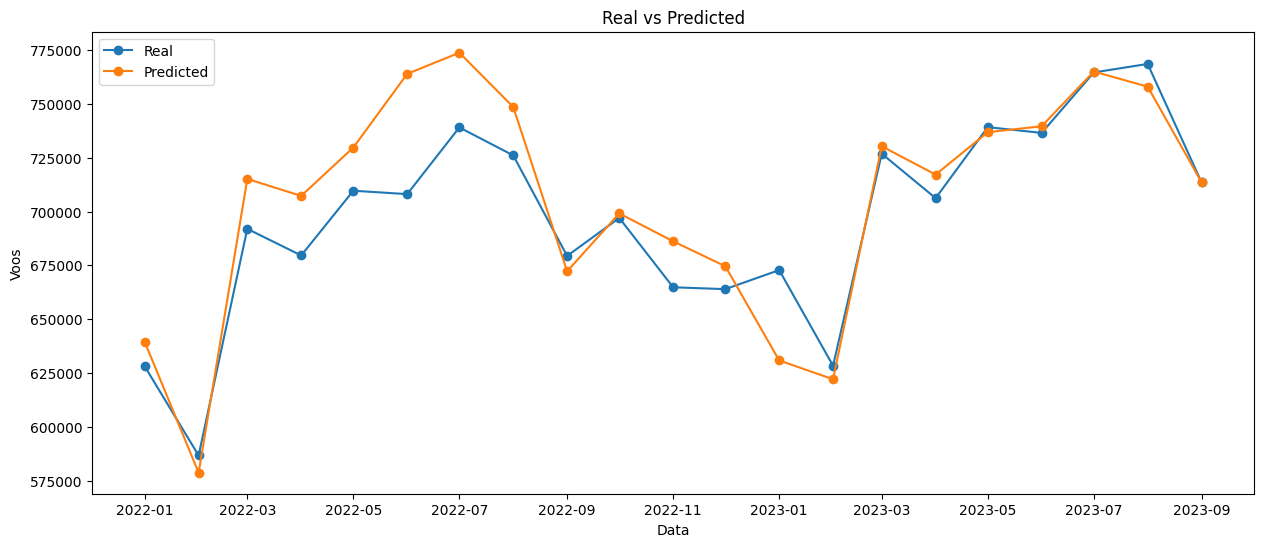

RMSE = 21184.426530544013
MAPE = 2.225182239150686


/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
# Prepare data
df_test_2022_2023 = df_test[(df_test['Data'] >= '2022-01-01') & (df_test['Data'] <= '2023-12-01')]
X_test_2022_2023 = df_test_2022_2023.dropna(subset=cols)[cols]
y_test_2022_2023 = df_test_2022_2023[['Data', 'Flt']]

# # # Normalize test data
# # X_test_2022_2023 = scaler.transform(X_test_2022_2023)
# 
# normalize_data = DataPreprocessing.normalize_data
# X_test_2022_2023 = normalize_data(X_train_validation, X_test_2022_2023)

# Predict
y_pred_2022_2023 = linear_regression_model.predict(model, X_test_2022_2023)

# Plot real vs predicted
y_test_2022_2023['Data'] = y_test_2022_2023['Data'].dt.to_timestamp()
y_test_2022_2023 = y_test_2022_2023.set_index('Data')
plot = Plot()
plot.plot_real_vs_predicted(y_test_2022_2023['Flt'], y_pred_2022_2023)

# Calculate and print errors
rmse = error_calculation.calculate_root_mean_squared_error(y_test_2022_2023['Flt'], y_pred_2022_2023)
mape = error_calculation.calculate_mean_absolute_percentage_error(y_test_2022_2023['Flt'], y_pred_2022_2023)

print(f'RMSE = {rmse}')
print(f'MAPE = {mape}')

## Adotando a seguinte divisão dos dados:
- Treino: 2003-2019
- Validação: 2020-2021
- Teste: 2022-2023

/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/

X_train [[ 5.14877786e-01]
 [-9.35577246e-01]
 [ 7.05368502e-01]
 [ 2.05891041e-01]
 [ 5.41173616e-01]
 [ 7.11903051e-01]
 [ 1.25644884e+00]
 [ 1.25531676e+00]
 [ 4.14480739e-01]
 [ 9.41242810e-01]
 [ 1.82876816e-01]
 [ 7.03218979e-01]
 [ 5.53612188e-01]
 [ 1.51078208e-01]
 [ 1.26431609e+00]
 [ 1.02398511e+00]
 [ 1.27608115e+00]
 [ 1.35097053e+00]
 [ 1.92083770e+00]
 [ 2.06947004e+00]
 [ 9.87887456e-01]
 [ 1.62006213e+00]
 [ 1.02407109e+00]
 [ 1.32989087e+00]
 [ 9.34951873e-01]
 [ 1.92148425e-01]
 [ 1.84139133e+00]
 [ 1.39940644e+00]
 [ 1.92437724e+00]
 [ 1.81045253e+00]
 [ 2.22124068e+00]
 [ 2.25276702e+00]
 [ 1.00095655e+00]
 [ 1.22357547e+00]
 [ 7.14038244e-01]
 [ 8.65679916e-01]
 [ 6.40596213e-01]
 [-4.35540909e-01]
 [ 1.24901149e+00]
 [ 8.02913849e-01]
 [ 1.22995239e+00]
 [ 1.21572255e+00]
 [ 1.74136687e+00]
 [ 1.92581026e+00]
 [ 7.96608582e-01]
 [ 1.20983286e+00]
 [ 6.79946811e-01]
 [ 9.62107512e-01]
 [ 9.55257699e-01]
 [-2.79858134e-01]
 [ 1.37344021e+00]
 [ 1.04327349e+00]
 [ 1

/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K = 16, RMSE = 155430.36567289886
X_train [[ 1.30834448  1.04872393  1.27295977 ...  0.665296   -0.9439687
   0.47791069]
 [ 1.38219044  1.29684081  1.03745435 ...  0.17505012  0.66560498
  -0.94439995]
 [ 1.94411776  1.37054811  1.28448859 ...  0.50413584  0.17567667
   0.66470515]
 ...
 [-0.4805053   0.62977987  0.65791582 ...  0.45964731  0.01292011
  -0.16124874]
 [ 0.03719357 -0.48865013  0.62033831 ...  0.34616851  0.46008951
   0.01221029]
 [-0.63522007  0.02807669 -0.49321153 ... -0.80686222  0.34668421
   0.45924951]]
X_validation [[-1.44298481e-01 -6.43074402e-01  2.12605989e-02 -4.97105274e-01
   6.17398528e-01  6.54496684e-01  2.23791348e-01  1.43380002e-01
  -3.29708230e-01  6.02510019e-03 -1.87841908e+00 -9.52309942e-01
  -6.17799985e-01 -9.26593010e-01 -2.76080164e-01 -8.05599617e-01
   3.45877227e-01]
 [-4.63873715e-01 -1.53074588e-01 -6.46961987e-01  1.76594831e-02
  -4.96940201e-01  6.16901566e-01  6.54582812e-01  2.18969196e-01
   1.39302390e-01 -3.34934600e-01 -1.05

/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/renato/

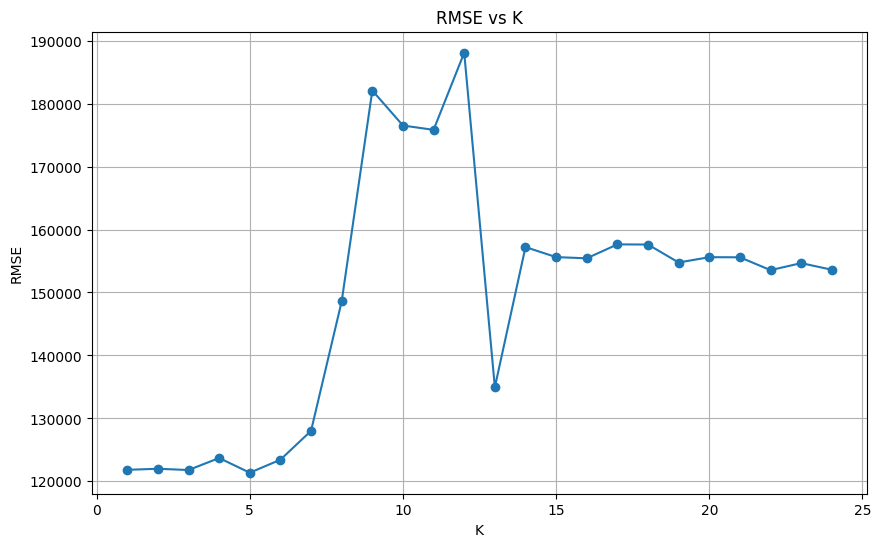

Best K = 5 with RMSE = 121371.60906118396


/tmp/ipykernel_58634/3117093227.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Data'] = y_test['Data'].dt.to_timestamp()


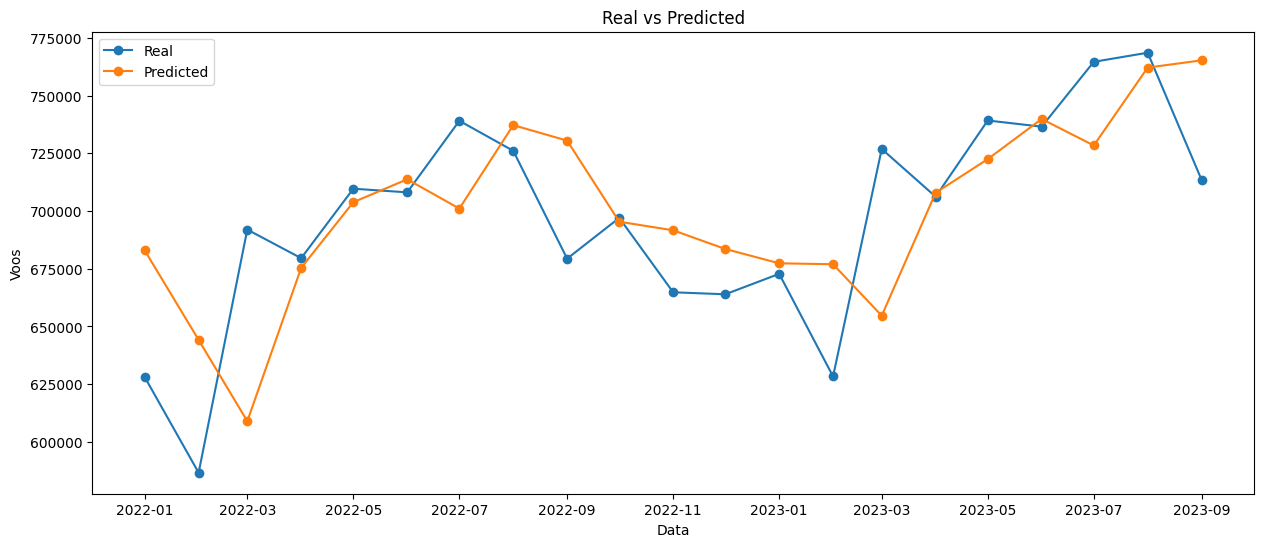

RMSE = 38127.679233339
MAPE = 4.207929673867221


/home/renato/git/regressao_linear_previsao_serie_temporal_trafego_aereo_US/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
# Split data
df_train_validation = df_voos[(df_voos['Data'] >= '2003-01-01') & (df_voos['Data'] <= '2021-12-01')]
df_train = df_train_validation[(df_train_validation['Data'] >= '2003-01-01') & (df_train_validation['Data'] <= '2019-12-01')]
df_validation = df_train_validation[(df_train_validation['Data'] >= '2020-01-01') & (df_train_validation['Data'] <= '2021-12-01')]
df_test = df_voos[(df_voos['Data'] >= '2022-01-01') & (df_voos['Data'] <= '2023-12-01')]

# Create a StandardScaler instance
scaler = StandardScaler()

# Train model and calculate errors for each k
rsmes = []
for k in range(1, K_WINDOWS_MAX + 1):
    cols = ['Lag' + str(i) for i in range(1, k + 1)]

    X_train = df_train.dropna(subset=cols)[cols]
    y_train = df_train.dropna(subset=cols)['Flt']

    X_validation = df_validation.dropna(subset=cols)[cols]
    y_validation = df_validation.dropna(subset=cols)['Flt']

    # Fit the scaler to the training data and transform both training and validation data
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)

    print("X_train", X_train)
    print("X_validation", X_validation)

    linear_regression_model = LinearRegressionModel()
    model = linear_regression_model.train(X_train, y_train)

    y_pred = linear_regression_model.predict(model, X_validation)

    error_calculation = ErrorCalculation()

    rmse = error_calculation.calculate_root_mean_squared_error(y_validation, y_pred)
    rsmes.append(rmse)

    print(f'K = {k}, RMSE = {rmse}')
    
# Plot RMSE vs K
plot = Plot()
plot.plot_rmse_vs_k(rsmes)

# Find best K and prepare data
best_k = np.argmin(rsmes) + 1
print(f'Best K = {best_k} with RMSE = {rsmes[best_k - 1]}')
cols = ['Lag' + str(i) for i in range(1, best_k + 1)]
X_train_validation = df_train_validation.dropna(subset=cols)[cols]
y_train_validation = df_train_validation.dropna(subset=cols)['Flt']
X_test = df_test.dropna(subset=cols)[cols]
y_test = df_test[['Data', 'Flt']]

# Fit the scaler to the training data and transform both training and test data
X_train_validation = scaler.fit_transform(X_train_validation) # Fit the scaler to the training data
X_test = scaler.transform(X_test)
    
# Train model with best K and predict
linear_regression_model = LinearRegressionModel()
model = linear_regression_model.train(X_train_validation, y_train_validation)
y_pred = linear_regression_model.predict(model, X_test)

# Plot real vs predicted
y_test['Data'] = y_test['Data'].dt.to_timestamp()
y_test = y_test.set_index('Data')
plot = Plot()
plot.plot_real_vs_predicted(y_test['Flt'], y_pred)

# Calculate and print errors
error_calculation = ErrorCalculation()

rmse = error_calculation.calculate_root_mean_squared_error(y_test['Flt'], y_pred)
mape = error_calculation.calculate_mean_absolute_percentage_error(y_test['Flt'], y_pred)

print(f'RMSE = {rmse}')
print(f'MAPE = {mape}')

O modelo foi treinado com dados anteriores à pandemia e validado com dados durante a pandemia. O resultado mostrou que o melhor valor para o parâmetro k foi 5. Isso significa que o modelo de regressão linear utilizado teve um desempenho melhor ao considerar as últimas 5 observações (Lag1 a Lag5) para prever o valor futuro.

Essa descoberta é interessante, pois indica que as últimas 5 observações têm uma influência significativa no valor futuro. Isso pode ser explicado pelo fato de que a pandemia teve um impacto significativo nas viagens aéreas, e as tendências recentes podem fornecer informações valiosas para prever o comportamento futuro.

No entanto, é importante ressaltar que o desempenho do modelo pode variar dependendo dos dados e do contexto específico. Portanto, é necessário realizar uma análise mais aprofundada e considerar outros fatores relevantes para obter previsões mais precisas.

## Observações: 
    A normalização foi aplicada apenas aos recursos de entrada (X_train, X_validation, X_train_validation, X_test) e não ao alvo (y_train, y_validation, y_train_validation, y_test). Isso ocorre porque a normalização do alvo pode não ser necessária ou desejada, dependendo do contexto. Se você quiser normalizar o alvo também, você pode seguir uma abordagem semelhante.